# Healthcare EDA


In [ ]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Json Data File





In [ ]:
with open('Healthcare_data.json', 'r') as file:
    raw_data = file.read()

## Column Renaming & Error Fix

In [ ]:
clean_data = raw_data.replace('\n', '').replace('\r', '')
clean_data = clean_data.replace('bi lling_amount', 'billing_amount')
clean_data = clean_data.replace('v isit_count', 'visit_count')
data_dict = json.loads(clean_data)
df = pd.DataFrame(data_dict)
df.head()

,patient_id,age,gender,disease,department,visit_count,billing_amount
0,None,NaN,None,Diabetes,Cardiology,NaN,5091.53
1,435f0688-978b-4129-a261-f927652cb577,NaN,Female,Asthma,None,NaN,18883.70
2,7362e297-9348-4d09-821d-0a943a490c40,NaN,None,Hypertension,Cardiology,8.0,NaN
3,None,72.0,Female,Diabetes,None,10.0,NaN
4,eef32c80-0cef-4f83-84fb-83b00b2ce343,87.0,Other,None,General,NaN,4702.42


## Data Cleaning

In [ ]:
df = df.drop_duplicates()
df['gender'] = df['gender'].fillna('Unknown')
df['disease'] = df['disease'].fillna('Unknown')
df['department'] = df['department'].fillna('Unknown')
df['age'] = pd.to_numeric(df['age'], errors='coerce').fillna(df['age'].median())
df['billing_amount'] = pd.to_numeric(df['billing_amount'], errors='coerce').fillna(0)
df['visit_count'] = pd.to_numeric(df['visit_count'], errors='coerce').fillna(0)

print("Cleaning Healthcare Data")
print(df.head(10))


df['age'] = df['age'].fillna(df['age'].median())
df['visit_count'] = df['visit_count'].fillna(df['visit_count'].mean())
df['billing_amount'] = df['billing_amount'].fillna(df['billing_amount'].median())

for col in ['gender', 'disease', 'department']:
    df[col] = df[col].fillna(df[col].mode()[0])

df['gender'] = df['gender'].replace('Other', 'Others')
df['gender'] = df['gender'].replace('Unknown', 'Others')
df['disease'] = df['disease'].replace('Unknown', 'Others')

df['age'] = df['age'].astype(int)
df['visit_count'] = df['visit_count'].astype(int)
Q1 = df['billing_amount'].quantile(0.25)
Q3 = df['billing_amount'].quantile(0.75)
IQR = Q3 - Q1

df = df[
    (df['billing_amount'] >= Q1 - 1.5 * IQR) &
    (df['billing_amount'] <= Q3 + 1.5 * IQR)
]

print("Cleaned dataset shape:", df.shape)

df.info()

Cleaning Healthcare Data
                             patient_id   age   gender        disease  \
0                                  None  51.0  Unknown       Diabetes   
1  435f0688-978b-4129-a261-f927652cb577  51.0   Female         Asthma   
2  7362e297-9348-4d09-821d-0a943a490c40  51.0  Unknown   Hypertension   
3                                  None  72.0   Female       Diabetes   
4  eef32c80-0cef-4f83-84fb-83b00b2ce343  87.0    Other        Unknown   
5  8af40314-6a19-44d4-a2c0-3cd1e8b66871  51.0  Unknown       Diabetes   
6  0041807e-3099-43c0-ba9e-906948d0aa19  51.0  Unknown   Hypertension   
7                                  None  51.0   Female   Hypertension   
8  11293f08-0b02-459d-a6e5-026c2c0d48c9  51.0     Male  Heart Disease   
9  bd38b444-e155-4e43-8c9b-6c8d322e8643  75.0  Unknown  Heart Disease   

    department  visit_count  billing_amount  
0   Cardiology          0.0         5091.53  
1      Unknown          0.0        18883.70  
2   Cardiology          8.0      

# Insights

## Disease Distribution by Patient Count

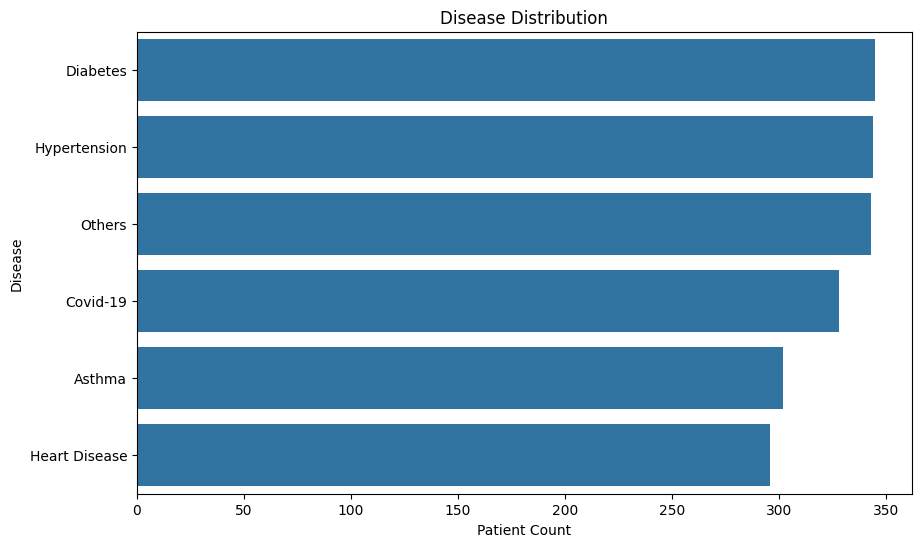

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y='disease', data=df, order=df['disease'].value_counts().index)
plt.title("Disease Distribution")
plt.xlabel("Patient Count")
plt.ylabel("Disease")
plt.show()

## Gender Distribution

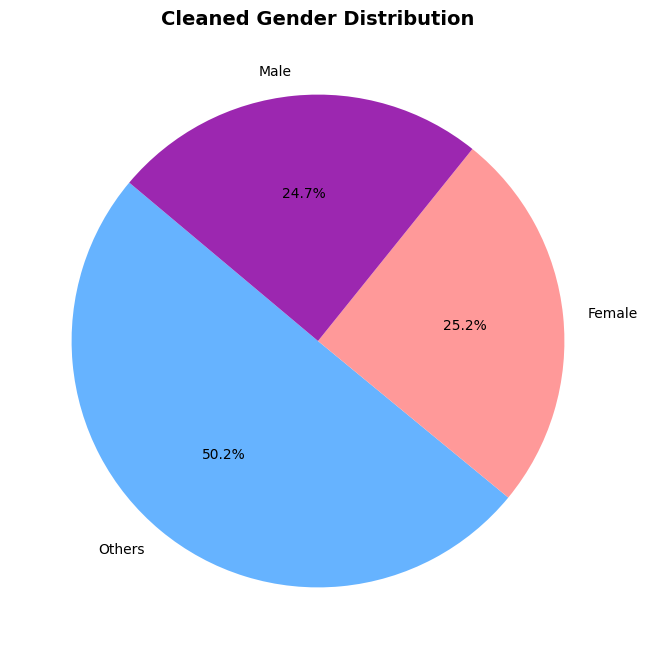

In [ ]:
plt.figure(figsize=(8,8))
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#ff9999','#9C27B0'], startangle=140)
plt.title('Cleaned Gender Distribution', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.savefig('gender_distribution.png')

## Disease vs Department

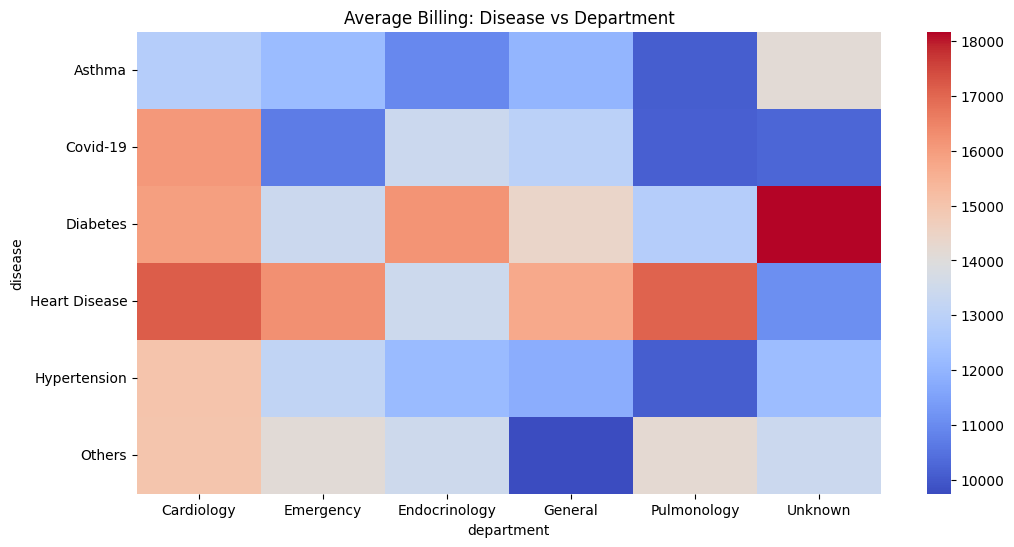

In [ ]:
pivot = pd.pivot_table(
    df,
    values='billing_amount',
    index='disease',
    columns='department',
    aggfunc='mean'
)

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='coolwarm', annot=False)
plt.title("Average Billing: Disease vs Department")
plt.show()

## Disease Patterns Split by Gender

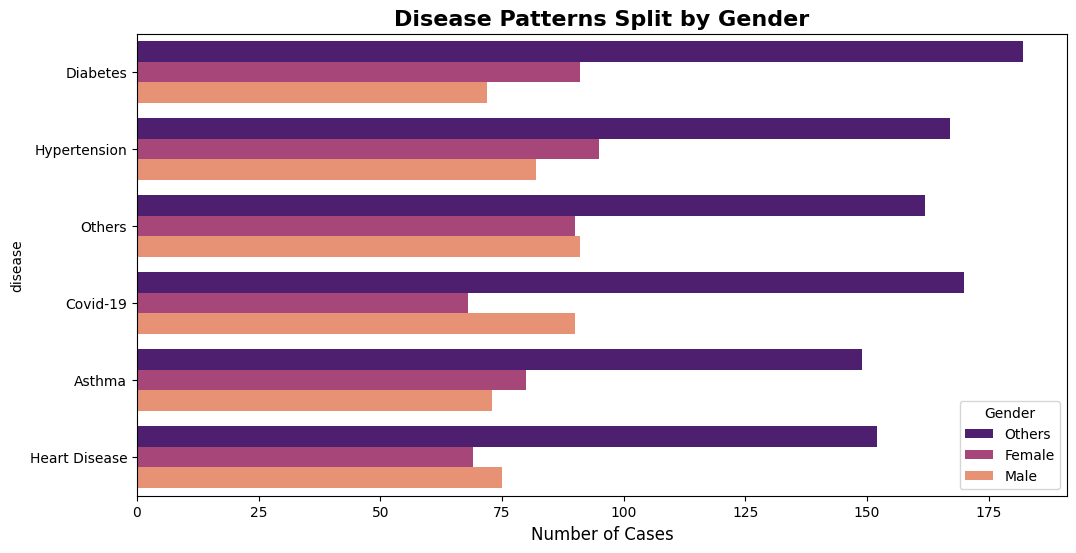

In [ ]:
plt.figure(figsize=(12, 6))
disease_order = df['disease'].value_counts().index
sns.countplot(data=df, y='disease', hue='gender', palette='magma', order=disease_order)
plt.title('Disease Patterns Split by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Number of Cases', fontsize=12)
plt.legend(title='Gender')
plt.show()

## High-Risk Demographics

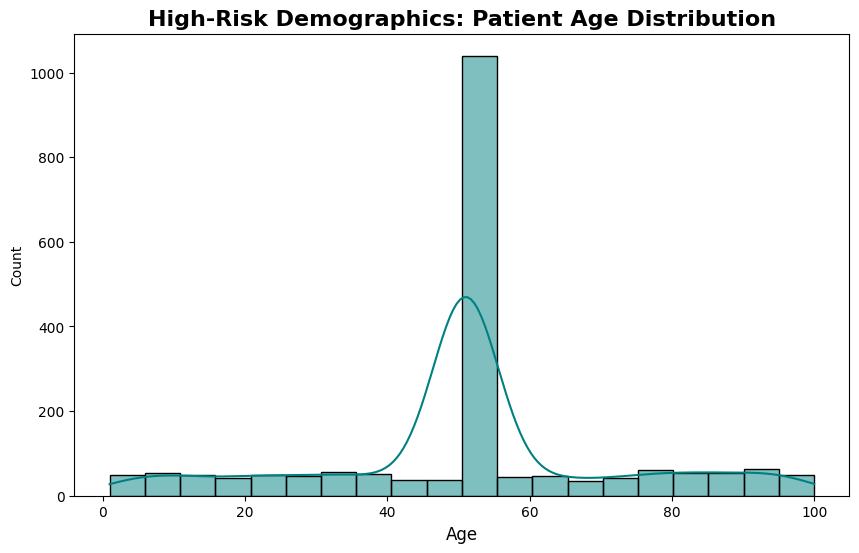

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='teal')
plt.title('High-Risk Demographics: Patient Age Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.show()